In [171]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep as hep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


See here: https://cms-analysis.docs.cern.ch/guidelines/plotting/colors/ for plot styling suggestions from PubComm

In [172]:
prefix = './coffea/skimmed/'

In [173]:
sig_histo = util.load(f'{prefix}/signal_2018_official_skimMET200_nominal_xclean.coffea')[0]

# Single Electron Efficiency

## Efficiency vs. Lxy

In [174]:
rebin = 1j

histo = {'ele': sig_histo['gen_ele_vxy100_vs_reco_type'][{"cut":"cut1","samp":sum}][::rebin,:],
         'pos': sig_histo['gen_pos_vxy100_vs_reco_type'][{"cut":"cut1","samp":sum}][::rebin,:]
        }

# Efficiency
h_num = {'ele': histo['ele'][:,1:],
         'pos': histo['pos'][:,1:]
        }
h_denom = {'ele': np.sum(histo['ele'][:,:].values(), axis=1),
           'pos': np.sum(histo['pos'][:,:].values(), axis=1)
          }

h_num_reco = {}
h_eff_reco = {}

for type in h_num:
    h_num_reco[type] = {'total': np.sum(h_num[type].values(), axis=1),
                        'lpt': histo[type][:,1].values(),
                        'pf': histo[type][:,2].values()
                       }

    h_eff_reco[type] = {'total': h_num_reco[type]['total']/h_denom[type],
                        'lpt': h_num_reco[type]['lpt']/h_denom[type],
                        'pf': h_num_reco[type]['pf']/h_denom[type]
                       }

h_eff = {}
h_eff['total'] = (h_num_reco['ele']['total'] + h_num_reco['pos']['total'])/(h_denom['ele'] + h_denom['pos'])
h_eff['pf'] = (h_num_reco['ele']['pf'] + h_num_reco['pos']['pf'])/(h_denom['ele'] + h_denom['pos'])
h_eff['lpt'] = (h_num_reco['ele']['lpt'] + h_num_reco['pos']['lpt'])/(h_denom['ele'] + h_denom['pos'])

In [175]:
h_num['ele'].axes[0]

Regular(100, 0, 100, name='vxy')

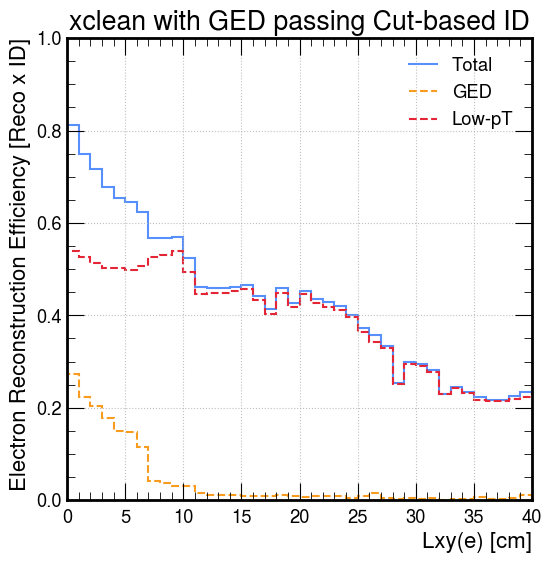

In [176]:
fig, ax = plt.subplots(figsize=(6,6))

#bins = np.linspace(0, 100, 50) # rebin 2j
#bins = np.linspace(0, 100, 100)

hep.histplot(h_eff['total'], label='Total')
hep.histplot(h_eff['pf'], label='GED', linestyle='--')
hep.histplot(h_eff['lpt'], label='Low-pT', linestyle='--')

plt.grid()

plt.xlim([0,40])
plt.ylim([0,1])

plt.ylabel('Electron Reconstruction Efficiency [Reco x ID]')
plt.xlabel('Lxy(e) [cm]')

plt.legend()

plt.title('xclean with GED passing Cut-based ID')

plt.savefig('plots/reco_ele_eff_Lxy_xclean_GEDcutbasedID.png', bbox_inches='tight')

## Efficiency vs. pt

In [177]:
rebin = 1j

histo = {'ele': sig_histo['gen_ele_pt_vs_reco_type'][{"cut":"cut1","samp":sum}][::rebin,:],
         'pos': sig_histo['gen_pos_pt_vs_reco_type'][{"cut":"cut1","samp":sum}][::rebin,:]
        }

# Efficiency
h_num = {'ele': histo['ele'][:,1:],
         'pos': histo['pos'][:,1:]
        }
h_denom = {'ele': np.sum(histo['ele'][:,:].values(), axis=1),
           'pos': np.sum(histo['pos'][:,:].values(), axis=1)
          }

h_num_reco = {}
h_eff_reco = {}

for type in h_num:
    h_num_reco[type] = {'total': np.sum(h_num[type].values(), axis=1),
                        'lpt': histo[type][:,1].values(),
                        'pf': histo[type][:,2].values()
                       }

    h_eff_reco[type] = {'total': h_num_reco[type]['total']/h_denom[type],
                        'lpt': h_num_reco[type]['lpt']/h_denom[type],
                        'pf': h_num_reco[type]['pf']/h_denom[type]
                       }

h_eff = {}
h_eff['total'] = (h_num_reco['ele']['total'] + h_num_reco['pos']['total'])/(h_denom['ele'] + h_denom['pos'])
h_eff['pf'] = (h_num_reco['ele']['pf'] + h_num_reco['pos']['pf'])/(h_denom['ele'] + h_denom['pos'])
h_eff['lpt'] = (h_num_reco['ele']['lpt'] + h_num_reco['pos']['lpt'])/(h_denom['ele'] + h_denom['pos'])

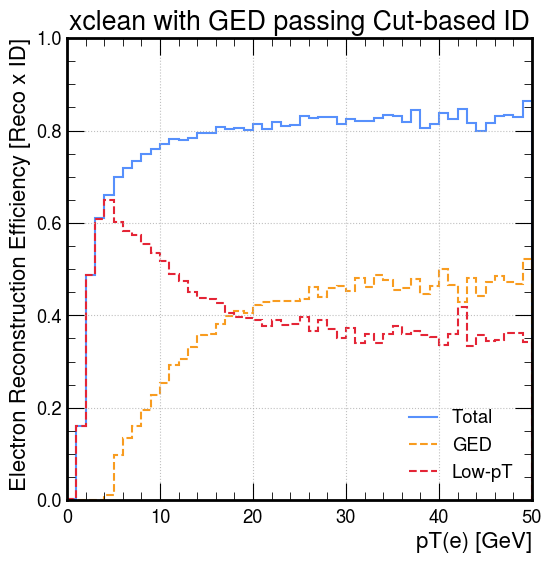

In [178]:
fig, ax = plt.subplots(figsize=(6,6))

#bins = np.linspace(0, 50, 25) # rebin 2j
#bins = np.linspace(0, 50, 50)

#plt.plot(h_eff['total'], '-', label='Total')
#plt.plot(h_eff['pf'], '--', label='GED')
#plt.plot(h_eff['lpt'], '--', label='Low-pT')

hep.histplot(h_eff['total'], label='Total')
hep.histplot(h_eff['pf'], label='GED', linestyle='--')
hep.histplot(h_eff['lpt'], label='Low-pT', linestyle='--')

plt.grid()

plt.xlim([0,50])
plt.ylim([0,1])

plt.ylabel('Electron Reconstruction Efficiency [Reco x ID]')
plt.xlabel('pT(e) [GeV]')

plt.legend()

plt.title('xclean with GED passing Cut-based ID')

plt.savefig('plots/reco_ele_eff_pt_xclean_GEDcutbasedID.png', bbox_inches='tight')

# Double Electron Efficiency

## Efficiency vs. Lxy

In [179]:
rebin = 1j

histo = sig_histo['gen_ee_vxy100_vs_reco_type'][{"cut":"cut1","samp":sum}][::rebin,:]

# Efficiency
h_num = histo[:,1:]
h_denom = np.sum(histo[:,:].values(), axis=1)

h_num_reco = {'total': np.sum(h_num.values(), axis=1),
              'LL': histo[:,1].values(),
              'RL': histo[:,2].values(),
              'RR': histo[:,3].values(),
             }

h_eff_reco = {'total': h_num_reco['total']/h_denom,
              'LL': h_num_reco['LL']/h_denom,
              'RL': h_num_reco['RL']/h_denom,
              'RR': h_num_reco['RR']/h_denom,
             }

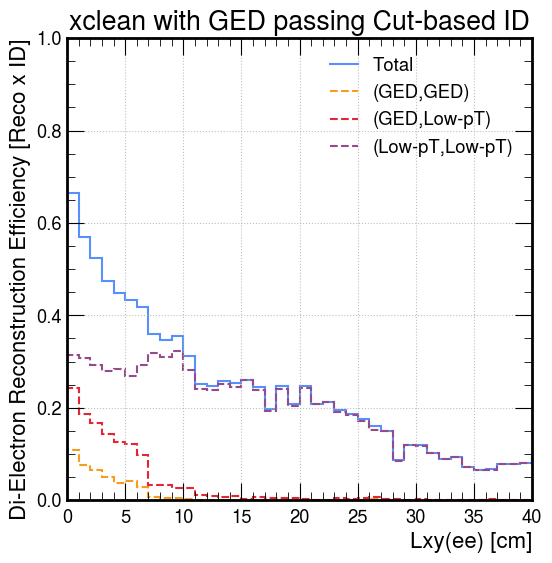

In [180]:
fig, ax = plt.subplots(figsize=(6,6))

bins = np.linspace(0, 100, 50) # rebin 2j
#bins = np.linspace(0, 100, 100)

#plt.plot(bins, h_eff_reco['total'], '-', label='Total')
#plt.plot(bins, h_eff_reco['RR'], '--', label='(GED,GED)')
#plt.plot(bins, h_eff_reco['RL'], '--', label='(GED,Low-pT)')
#plt.plot(bins, h_eff_reco['LL'], '--', label='(Low-pT,Low-pT)')

hep.histplot(h_eff_reco['total'], label='Total')
hep.histplot(h_eff_reco['RR'], label='(GED,GED)', linestyle='--')
hep.histplot(h_eff_reco['RL'], label='(GED,Low-pT)', linestyle='--')
hep.histplot(h_eff_reco['LL'], label='(Low-pT,Low-pT)', linestyle='--')

plt.grid()

plt.xlim([0,40])
plt.ylim([0,1])

plt.ylabel('Di-Electron Reconstruction Efficiency [Reco x ID]')
plt.xlabel('Lxy(ee) [cm]')

plt.legend()

plt.title('xclean with GED passing Cut-based ID')

plt.savefig('plots/reco_diele_eff_Lxy_xclean_GEDcutbasedID.png', bbox_inches='tight')

## Efficiency vs. pt

In [181]:
rebin = 1j

histo = sig_histo['gen_ee_pt_vs_reco_type'][{"cut":"cut1","samp":sum}][::rebin,:]

# Efficiency
h_num = histo[:,1:]
h_denom = np.sum(histo[:,:].values(), axis=1)

h_num_reco = {'total': np.sum(h_num.values(), axis=1),
              'LL': histo[:,1].values(),
              'RL': histo[:,2].values(),
              'RR': histo[:,3].values(),
             }

h_eff_reco = {'total': h_num_reco['total']/h_denom,
              'LL': h_num_reco['LL']/h_denom,
              'RL': h_num_reco['RL']/h_denom,
              'RR': h_num_reco['RR']/h_denom,
             }

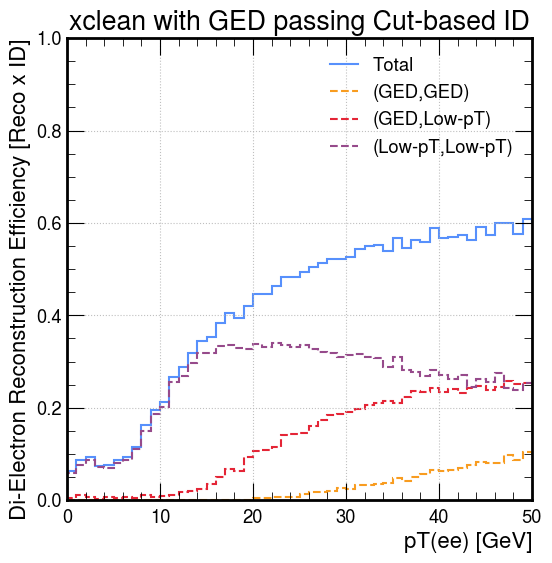

In [182]:
fig, ax = plt.subplots(figsize=(6,6))

#bins = np.linspace(0, 50, 25) # rebin 2j
#bins = np.linspace(0, 50, 50)


#plt.plot(bins, h_eff_reco['total'], '-', label='Total')
#plt.plot(bins, h_eff_reco['RR'], '--', label='(GED,GED)')
#plt.plot(bins, h_eff_reco['RL'], '--', label='(GED,Low-pT)')
#plt.plot(bins, h_eff_reco['LL'], '--', label='(Low-pT,Low-pT)')

hep.histplot(h_eff_reco['total'], label='Total')
hep.histplot(h_eff_reco['RR'], label='(GED,GED)', linestyle='--')
hep.histplot(h_eff_reco['RL'], label='(GED,Low-pT)', linestyle='--')
hep.histplot(h_eff_reco['LL'], label='(Low-pT,Low-pT)', linestyle='--')

plt.grid()


plt.xlim([0,50])
plt.ylim([0,1])

plt.ylabel('Di-Electron Reconstruction Efficiency [Reco x ID]')
plt.xlabel('pT(ee) [GeV]')

plt.legend()

plt.title('xclean with GED passing Cut-based ID')

plt.savefig('plots/reco_diele_eff_pt_xclean_GEDcutbasedID.png', bbox_inches='tight')